In [1]:
"""
테스트 데이터 : 30~60초 부근의 데이터를 가지는 파일들을 60초당 평균으로 한 행을 생성하는 작업을 NULL과 P0171 폴더에서 일부 파일 선택해 처리
테스트 1 : 60~90초의 NULL로 진단된 데이터를 위 작업으로 csv 생성후 논문의 모델 돌림 -> 이상 검출 X
테스트 2 : 30~60초의 P0171로 진단된 데이터를 위 작업으로 csv 생성후 논문의 모델 돌림 -> 이상 검출
=> 모델 테스트시 사용됨
"""

'\n테스트 데이터 : 30~60초 부근의 데이터를 가지는 파일들을 60초당 평균으로 한 행을 생성하는 작업을 NULL과 P0171 폴더에서 일부 파일 선택해 처리\n테스트 1 : 60~90초의 NULL로 진단된 데이터를 위 작업으로 csv 생성후 논문의 모델 돌림 -> 이상 검출 X\n테스트 2 : 30~60초의 P0171로 진단된 데이터를 위 작업으로 csv 생성후 논문의 모델 돌림 -> 이상 검출\n=> 모델 테스트시 사용됨\n'

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

##########모델 로드

model = tf.keras.models.load_model('C:\\Users\\.h5')
x_test1 = pd.read_csv('C:\\Users\\.csv',usecols=[''])
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_test1)
x_test = scaler.transform(x_test1)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

# reshape inputs for LSTM [samples, timesteps, features]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
print("Test data shape:", x_test.shape)

Test data shape: (198, 1, 7)


In [3]:
scored = pd.DataFrame(index=x_test1.index)
X_pred = model.predict(x_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_test1.columns)
X_pred.index = x_test1.index

Xtest = x_test.reshape(x_test.shape[0], x_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = np.percentile(scored,100)
#(scored['Loss_mae'].mean)*2
scored['Anomaly'] = scored['Loss_mae'] > (scored['Loss_mae'].mean())*2
scored#[scored['Anomaly']==True]

7/7 [==============================] - 1s 4ms/step


,Loss_mae,Threshold,Anomaly
0,0.178353,0.364104,False
1,0.186600,0.364104,False
2,0.249454,0.364104,False
3,0.230521,0.364104,False
4,0.166450,0.364104,False
...,...,...,...
193,0.204086,0.364104,False
194,0.186894,0.364104,False
195,0.191235,0.364104,False
196,0.171953,0.364104,False


In [4]:
scored[scored['Anomaly']==True]

,Loss_mae,Threshold,Anomaly
185,0.364104,0.364104,True


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

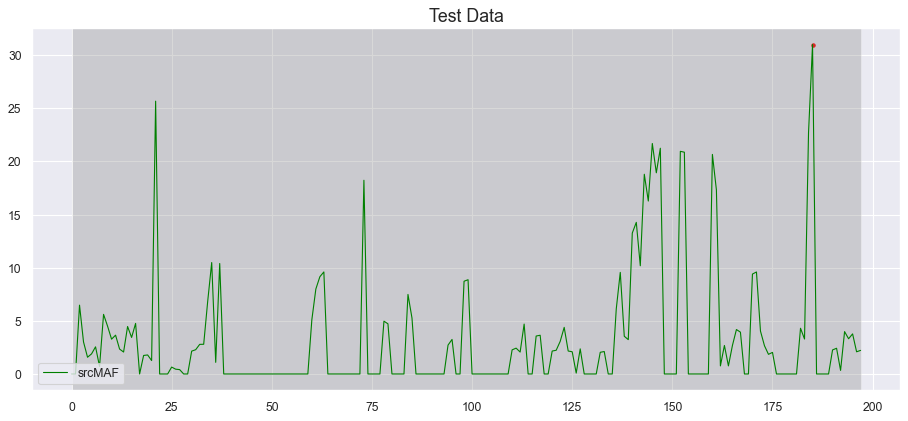

In [6]:
test_ = pd.DataFrame(x_test1,columns=[''])
fig, ax = plt.subplots(figsize=(14,6),dpi=80)
#생략
plt.legend(loc='lower left')
ax.set_title('Test Data',fontsize=16)
plt.axvspan(min(test_.index), max(test_.index),facecolor='gray',alpha=0.3)
plt.show()


In [7]:
##########모델 로드

model = tf.keras.models.load_model('C:\\Users\review.h5')
x_test1 = pd.read_csv('C:\\Users\\csv',usecols=[''])
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_test1)
x_test = scaler.transform(x_test1)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

# reshape inputs for LSTM [samples, timesteps, features]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
print("Test data shape:", x_test.shape)
scored = pd.DataFrame(index=x_test1.index)
X_pred = model.predict(x_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_test1.columns)
X_pred.index = x_test1.index

Xtest = x_test.reshape(x_test.shape[0], x_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = np.percentile(scored,100)
#(scored['Loss_mae'].mean)*2
scored['Anomaly'] = scored['Loss_mae'] > (scored['Loss_mae'].mean())*2
scored#[scored['Anomaly']==True]

Test data shape: (459, 1, 7)
15/15 [==============================] - 1s 3ms/step


,Loss_mae,Threshold,Anomaly
0,0.203936,0.29232,False
1,0.221398,0.29232,False
2,0.194146,0.29232,False
3,0.102569,0.29232,False
4,0.199833,0.29232,False
...,...,...,...
454,0.121146,0.29232,False
455,0.095237,0.29232,False
456,0.078133,0.29232,False
457,0.092974,0.29232,False


In [8]:
scored[scored['Anomaly']==True]

,Loss_mae,Threshold,Anomaly
23,0.277035,0.29232,True
38,0.262527,0.29232,True
242,0.292320,0.29232,True
256,0.244731,0.29232,True
263,0.243871,0.29232,True
264,0.227042,0.29232,True
429,0.239974,0.29232,True
441,0.238081,0.29232,True
445,0.245003,0.29232,True


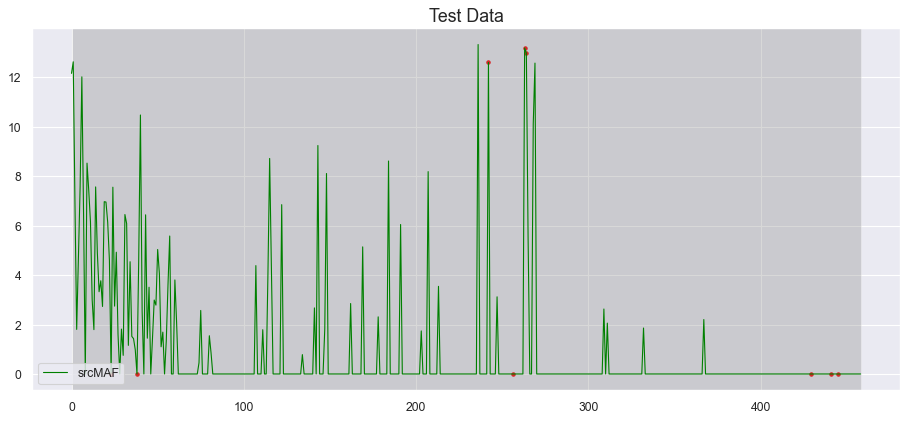

In [9]:
test_ = pd.DataFrame(x_test1,columns=[''])
fig, ax = plt.subplots(figsize=(14,6),dpi=80)
#생략
plt.legend(loc='lower left')
ax.set_title('Test Data',fontsize=16)
plt.axvspan(min(test_.index), max(test_.index),facecolor='gray',alpha=0.3)
plt.show()


In [10]:
test_[scored['Anomaly']==1]

,srcSpeed,srcAPS,srcGyroValue,srcRPM,srcTPS,srcMAF,srcEngineLoad
23,19.000000,0.0,-0.033362,2113.500000,49.411766,0.000000,60.653593
38,69.000000,0.0,3.961172,1673.500000,0.000000,0.000000,0.000000
242,92.500000,0.0,0.000000,2007.500000,0.000000,12.600000,19.607844
256,1.000000,0.0,-0.410369,2571.500000,0.000000,0.000000,18.529412
263,24.214286,0.0,0.191839,1708.392857,21.400560,13.184286,51.484594
264,32.000000,0.0,0.384902,1775.375000,19.946524,12.974545,47.700535
429,64.000000,0.0,0.013030,2522.000000,10.980393,0.000000,18.300654
441,67.428571,0.0,-0.243742,2638.000000,13.165266,0.000000,21.512606
445,73.571429,0.0,-0.018708,2297.285714,12.773109,0.000000,15.126050
